In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

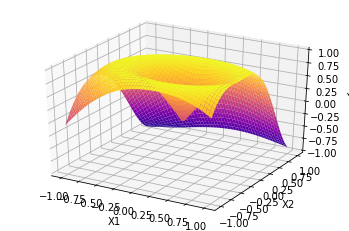

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [4]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

## Find best split with gradient descent -- scale error around break point with gaussian

In [25]:
optim = tnn.Adam()
linear = tnn.LinearLayer(2,1,optimizer=optim)

line0 = tnn.LinearLayer(2,1,optimizer=optim)
line1 = tnn.LinearLayer(2,1,optimizer=optim)
line0.weights *= 0
line1.weights *= 0

gaussian = tnn.Gaussian()

In [26]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dxl = linear.backward(dy*err_scaler)#*0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.12808679544955


200 Error =  0.07801975041581491


300 Error =  0.06797164260302878


400 Error =  0.062116768390354744


500 Error =  0.058430062189917836


600 Error =  0.05532827949367386


700 Error =  0.05357708221100993


800 Error =  0.05168076698269704


900 Error =  0.04969028854627542


1000 Error =  0.047541962281185644


1100 Error =  0.045809993490898364


1200 Error =  0.04425624175047572


1300 Error =  0.04255741175597215


1400 Error =  0.04103886323491556


1500 Error =  0.040139780062905604


1600 Error =  0.03916805589140479


1700 Error =  0.03850108172968071


1800 Error =  0.03823060101858433


1900 Error =  0.03797297011944981


2000 Error =  0.037846802658023114


2100 Error =  0.03770911200181462


2200 Error =  0.03771415255272111


2300 Error =  0.037668644084905514


2400 Error =  0.03767464983081022


2500 Error =  0.037673289107029224


2600 Error =  0.0376807083752524


2700 Error =  0.03757355751409109


2

TclError: invalid command name "pyimage164"

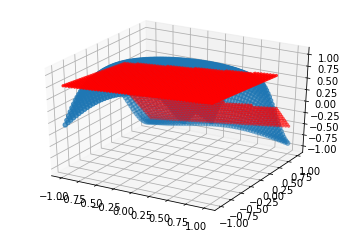

In [12]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
plt.show()

In [13]:
error, linear.weights, linear.bias

(0.046961543467054126, array([[ 0.25269128],
        [-2.40031799]]), array([1.24051028]))

In [14]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(1884, 616)

## Sigmoid based,, it has gaussian gradient scaling

In [22]:
optim = tnn.Adam()
linear = tnn.LinearLayer(2,1,optimizer=optim)

line0 = tnn.LinearLayer(2,1,optimizer=optim)
line1 = tnn.LinearLayer(2,1,optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [23]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dxl = linear.backward(sigmoid.backward(dy))#/0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.11965606859003433


200 Error =  0.10332559137231187


300 Error =  0.08629436581362898


400 Error =  0.07742862432649669


500 Error =  0.06939097342595789


600 Error =  0.06327238699988325


700 Error =  0.058108048360114274


800 Error =  0.054348627607088244


900 Error =  0.05125135962668228


1000 Error =  0.04902991496141247


1100 Error =  0.047032061124919367


1200 Error =  0.04564092391743938


1300 Error =  0.04445011553097149


1400 Error =  0.043539638222158186


1500 Error =  0.042858353676242224


1600 Error =  0.042254640151570336


1700 Error =  0.0416044388581158


1800 Error =  0.04134763157160696


1900 Error =  0.040872677333164055


2000 Error =  0.04055022719344997


2100 Error =  0.04037916983378729


2200 Error =  0.040013160493181536


2300 Error =  0.03980819202074758


2400 Error =  0.039623800564365694


2500 Error =  0.039370619481042785


2600 Error =  0.03920057500580966


2700 Error =  0.0391708251938525

TclError: invalid command name "pyimage134"

In [24]:
linear.weights, linear.bias

(array([[9.26369645],
        [6.96552891]]), array([-5.43772282]))